# Convolutional Neural Network

<h2>DL Group 10</h2>


<table>
  <tr>
    <th>Student Name</th>
    <th>BITS ID</th>
    <th>Contribution</th>
  </tr>
  <tr>
    <td>ADITYA NANDAN REDDY SANIVARAPU</td>
    <td>2022dc04019</td>
    <td>100%</td>
  </tr>
  <tr>
    <td>SANJANA SANJEEV DESHPANDE</td>
    <td>2022dc04091</td>
    <td>100%</td>
  </tr>
  <tr>
    <td>DINESH KUMAR NAYAK</td>
    <td>2022da04293</td>
    <td>100%</td>
  </tr>
</table>

In [1]:
# Import Libraries
# - Tensorflow
# - Keras
# - numpy and random

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

2021-11-12 17:04:58.591402: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-12 17:04:58.591494: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
tf.set_random_seed(42)  # sets the graph-level random seed

## Dataset - MNIST

In [3]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain), (Xtest,Ytest) = mnist.load_data()

# Display size of dataset
Xtrain = Xtrain.reshape((60000,28,28,1))
Xtrain = Xtrain.astype('float32')/255

Xtest = Xtest.reshape((10000,28,28,1))
Xtest = Xtest.astype('float32')/255

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest) 

print(Xtrain.shape, Xtest.shape)
print(Ytrain.shape, Ytest.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


## Create a CNN Model

In [4]:
# Create a Sequential model object
cnnModel = models.Sequential()

# Add layers Conv2D for CNN and specify MaxPooling

# Layer 1 = input layer
cnnModel.add(layers.Conv2D(16, (3,3), activation="relu", 
                           input_shape=(28,28,1) )) 
# 32 * (3 * 3 +1)
# fxf = 3x3
# number of kernels = 32

cnnModel.add(layers.MaxPooling2D((2,2)))


# Layer 2
cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))

cnnModel.add(layers.MaxPooling2D((2,2)))


# Layer 3
cnnModel.add(layers.Conv2D(32, (3,3), activation="relu" ))

cnnModel.add(layers.Flatten())


# Add Dense layers or fully connected layers
# Layer 4
cnnModel.add(layers.Dense(64, activation="relu" ))

# Layer 5
cnnModel.add(layers.Dense(32, activation="relu" ))

# Layer 6
cnnModel.add(layers.Dense(10, activation="softmax" ))

cnnModel.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [5]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 

cnnModel.compile(optimizer = "adam", loss = "categorical_crossentropy", 
                 metrics = ["accuracy"])


In [6]:
# train the model

history = cnnModel.fit(Xtrain, Ytrain, epochs = 25, 
                       batch_size = 64, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 45s 837us/sample - loss: 0.2381 - acc: 0.9252 - val_loss: 0.0729 - val_acc: 0.9772
Epoch 2/25
54000/54000 [==============================] - 47s 862us/sample - loss: 0.0630 - acc: 0.9807 - val_loss: 0.0410 - val_acc: 0.9873
Epoch 3/25
54000/54000 [==============================] - 52s 964us/sample - loss: 0.0440 - acc: 0.9862 - val_loss: 0.0402 - val_acc: 0.9895
Epoch 4/25
54000/54000 [==============================] - 44s 806us/sample - loss: 0.0346 - acc: 0.9890 - val_loss: 0.0461 - val_acc: 0.9867
Epoch 5/25
54000/54000 [==============================] - 39s 731us/sample - loss: 0.0279 - acc: 0.9914 - val_loss: 0.0394 - val_acc: 0.9885
Epoch 6/25
54000/54000 [==============================] - 42s 785us/sample - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0397 - val_acc: 0.9877
Epoch 7/25
54000/54000 [==============================] - 38s 697us/sample - loss: 0.0197 - acc: 0.9935 -

In [7]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['acc'][-1])

Final training loss 	 0.004080491340738448
Final training accuracy  0.99855554


In [8]:
# testing the model

testLoss, testAccuracy = cnnModel.evaluate( Xtest, Ytest)

10000/10000 [==============================] - 2s 185us/sample - loss: 0.0466 - acc: 0.9911


In [9]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.04660058710629925
Testing accuracy  0.9911


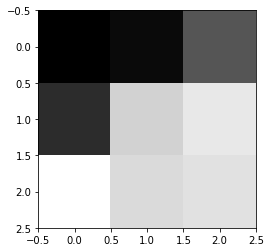

In [10]:
# shows the weights in layer 0 conv2d as gray map
top_layer = cnnModel.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')
plt.show()

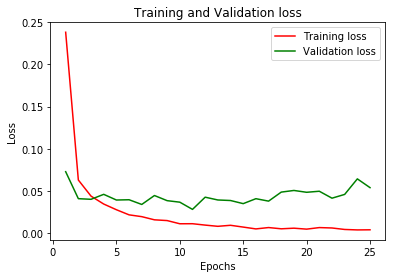

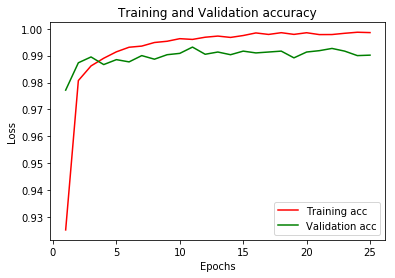

In [11]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Confusion Matrix generation

### Prediction for a specific testing data generte confusion matrix

In [12]:
Y_prediction = cnnModel.predict(Xtest)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction, axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(Ytest,axis = 1) 



In [13]:
# Classification Report

from sklearn.metrics import classification_report 

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



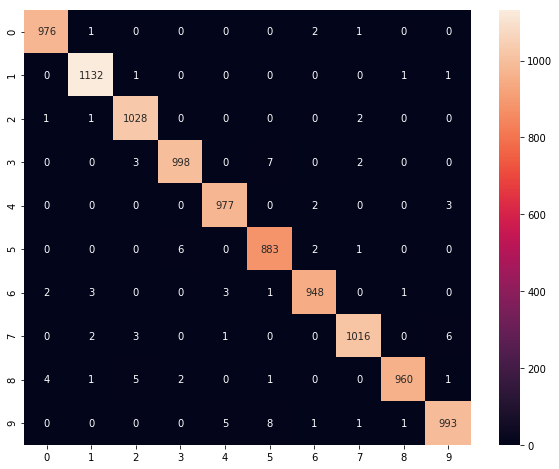

In [14]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

# Exercise 

Modify the code as per the below instructions
- Use a different dataset.
- Modify the architecture, as below
    - Conv Max Conv Max Conv Max Flatten FC FC    
    - Conv Conv Max Conv Conv Max Flatten Global Avg Pooling
- Change the number of kernels and kernel size. 



## Dataset -  Fashion MNIST

In [27]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load a different dataset
# Let's use the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for CNN
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


### Architecture 1 - Conv Max Conv Max Conv Max Flatten FC FC

In [11]:
# Create a Sequential model object
cnnModel_arch1 = models.Sequential()

# CNN architecture with 4x4 kernel size for all convolutional layers
cnnModel_arch1.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)))
cnnModel_arch1.add(layers.MaxPooling2D((2, 2)))
cnnModel_arch1.add(layers.Conv2D(128, (4, 4), activation='relu', padding='same'))  # Use padding='same' to maintain spatial dimensions
cnnModel_arch1.add(layers.MaxPooling2D((2, 2)))
cnnModel_arch1.add(layers.Conv2D(64, (4, 4), activation='relu', padding='same'))  # Use padding='same' to maintain spatial dimensions
cnnModel_arch1.add(layers.MaxPooling2D((2, 2)))
cnnModel_arch1.add(layers.Flatten())
cnnModel_arch1.add(layers.Dense(32, activation='relu'))
cnnModel_arch1.add(layers.Dense(16, activation='relu'))
cnnModel_arch1.add(layers.Dense(10, activation='softmax'))

# Print the summary of the model
cnnModel_arch1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 128)       65664     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 64)          131136    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 64)         

In [12]:
# Print the dimensions of each layer
for layer in cnnModel_arch1.layers:
    print(layer.name, layer.output_shape)
	

conv2d_3 (None, 25, 25, 32)
max_pooling2d_3 (None, 12, 12, 32)
conv2d_4 (None, 12, 12, 128)
max_pooling2d_4 (None, 6, 6, 128)
conv2d_5 (None, 6, 6, 64)
max_pooling2d_5 (None, 3, 3, 64)
flatten_1 (None, 576)
dense_3 (None, 32)
dense_4 (None, 16)
dense_5 (None, 10)


In [13]:
# Compile the model
cnnModel_arch1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Model Training & Test

In [14]:
# Train the model
history = cnnModel_arch1.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = cnnModel_arch1.evaluate(X_test, y_test)
print('Testing loss:', test_loss)
print('Testing accuracy:', test_accuracy)

Epoch 1/10
844/844 [==============================] - 20s 23ms/step - loss: 0.5959 - accuracy: 0.7879 - val_loss: 0.3907 - val_accuracy: 0.8552
Epoch 2/10
844/844 [==============================] - 20s 24ms/step - loss: 0.3463 - accuracy: 0.8768 - val_loss: 0.3235 - val_accuracy: 0.8788
Epoch 3/10
844/844 [==============================] - 20s 24ms/step - loss: 0.2897 - accuracy: 0.8948 - val_loss: 0.2780 - val_accuracy: 0.8968
Epoch 4/10
844/844 [==============================] - 29s 34ms/step - loss: 0.2544 - accuracy: 0.9063 - val_loss: 0.2850 - val_accuracy: 0.8995
Epoch 5/10
844/844 [==============================] - 32s 38ms/step - loss: 0.2233 - accuracy: 0.9184 - val_loss: 0.2542 - val_accuracy: 0.9045
Epoch 6/10
844/844 [==============================] - 32s 38ms/step - loss: 0.2020 - accuracy: 0.9259 - val_loss: 0.2407 - val_accuracy: 0.9140
Epoch 7/10
844/844 [==============================] - 31s 37ms/step - loss: 0.1799 - accuracy: 0.9340 - val_loss: 0.2352 - val_accuracy:

## Results and Outputs

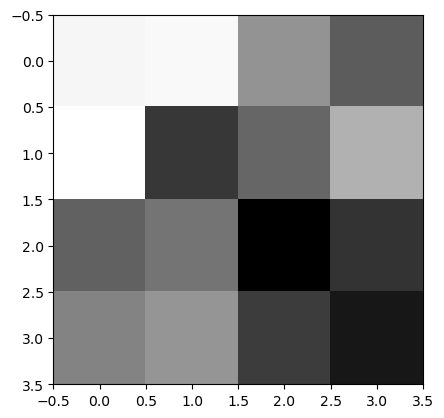

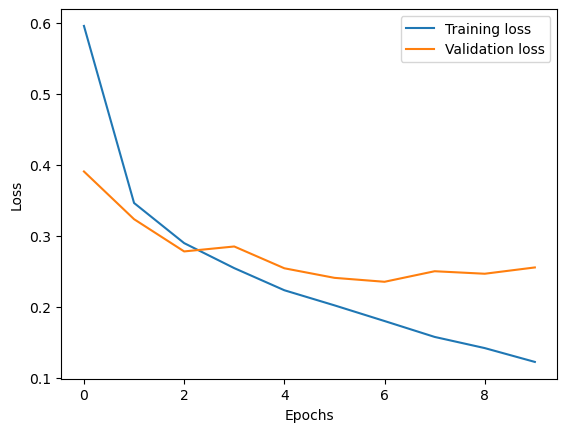

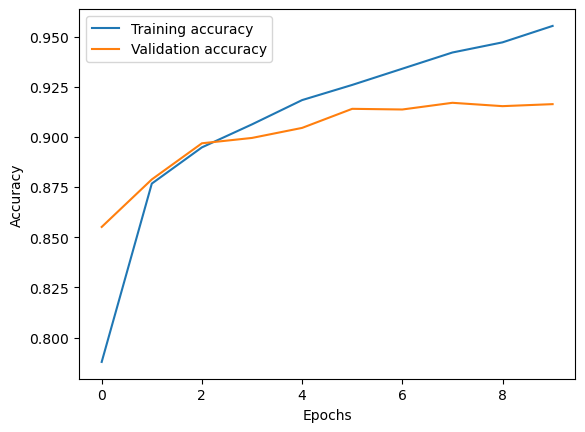

In [15]:
# shows the weights in layer 0 conv2d as gray map
top_layer = cnnModel_arch1.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Confusion Matrix generation

### Prediction for a specific testing data generte confusion matrix

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.90      0.87      1000
           3       0.93      0.90      0.92      1000
           4       0.89      0.85      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.73      0.78      0.75      1000
           7       0.96      0.94      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



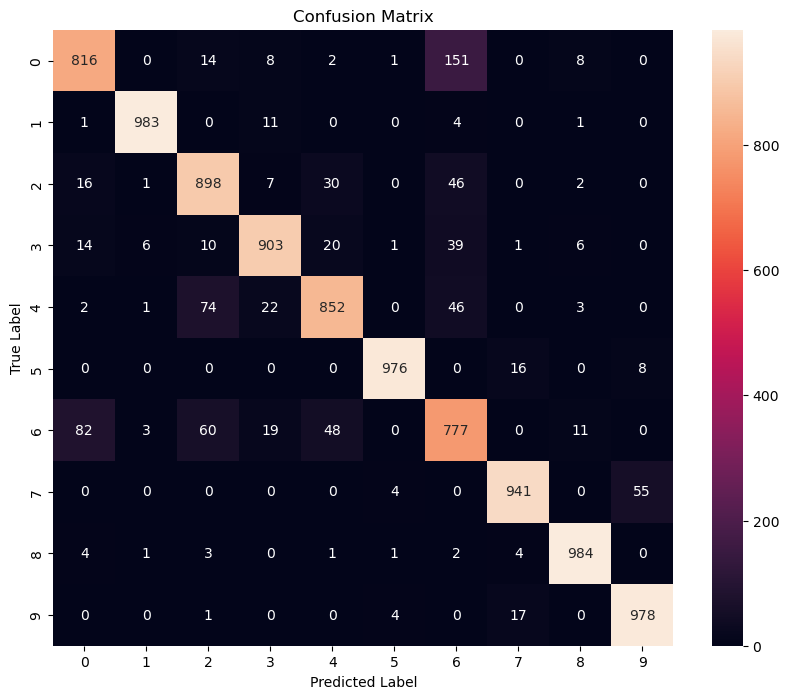

In [16]:
# Generate confusion matrix
y_pred = cnnModel_arch1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Classification Report
from sklearn.metrics import classification_report 

print(classification_report(y_true, y_pred_classes))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Architecture 2 - Conv Conv Max Conv Conv Max Flatten Global Avg Pooling

In [17]:
# CNN architecture 2
# Create a Sequential model object
cnnModel_arch2 = models.Sequential()
cnnModel_arch2.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)))
cnnModel_arch2.add(layers.Conv2D(48, (4, 4), activation='relu'))
cnnModel_arch2.add(layers.MaxPooling2D((2, 2)))
cnnModel_arch2.add(layers.Conv2D(64, (4, 4), activation='relu', padding='same'))
cnnModel_arch2.add(layers.Conv2D(32, (4, 4), activation='relu', padding='same'))
cnnModel_arch2.add(layers.MaxPooling2D((2, 2)))
cnnModel_arch2.add(layers.GlobalAveragePooling2D())
cnnModel_arch2.add(layers.Flatten())
cnnModel_arch2.add(layers.Dense(16, activation='relu'))
cnnModel_arch2.add(layers.Dense(10, activation='softmax'))
cnnModel_arch2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 48)        24624     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 11, 11, 48)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        49216     
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        32800     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                 

In [18]:
# Print the dimensions of each layer
for layer in cnnModel_arch2.layers:
    print(layer.name, layer.output_shape)

conv2d_6 (None, 25, 25, 32)
conv2d_7 (None, 22, 22, 48)
max_pooling2d_6 (None, 11, 11, 48)
conv2d_8 (None, 11, 11, 64)
conv2d_9 (None, 11, 11, 32)
max_pooling2d_7 (None, 5, 5, 32)
global_average_pooling2d (None, 32)
flatten_2 (None, 32)
dense_6 (None, 16)
dense_7 (None, 10)


In [19]:
# Compile the model
cnnModel_arch2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Train the model
history = cnnModel_arch2.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = cnnModel_arch2.evaluate(X_test, y_test)
print('Testing loss:', test_loss)
print('Testing accuracy:', test_accuracy)

Epoch 1/10
844/844 [==============================] - 49s 57ms/step - loss: 0.7841 - accuracy: 0.7144 - val_loss: 0.5301 - val_accuracy: 0.7962
Epoch 2/10
844/844 [==============================] - 53s 62ms/step - loss: 0.4810 - accuracy: 0.8213 - val_loss: 0.4014 - val_accuracy: 0.8558
Epoch 3/10
844/844 [==============================] - 54s 64ms/step - loss: 0.3898 - accuracy: 0.8593 - val_loss: 0.3613 - val_accuracy: 0.8683
Epoch 4/10
844/844 [==============================] - 50s 59ms/step - loss: 0.3431 - accuracy: 0.8766 - val_loss: 0.3123 - val_accuracy: 0.8843
Epoch 5/10
844/844 [==============================] - 49s 59ms/step - loss: 0.3089 - accuracy: 0.8880 - val_loss: 0.2973 - val_accuracy: 0.8878
Epoch 6/10
844/844 [==============================] - 51s 60ms/step - loss: 0.2839 - accuracy: 0.8976 - val_loss: 0.2875 - val_accuracy: 0.8955
Epoch 7/10
844/844 [==============================] - 51s 61ms/step - loss: 0.2649 - accuracy: 0.9050 - val_loss: 0.2716 - val_accuracy:

## Results and Outputs

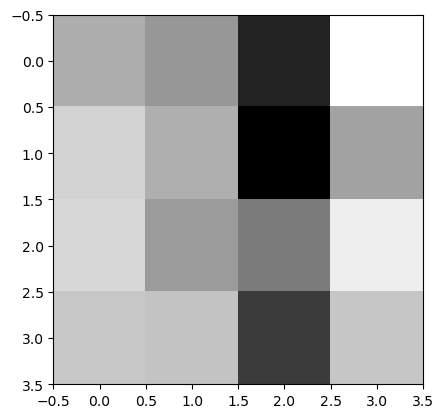

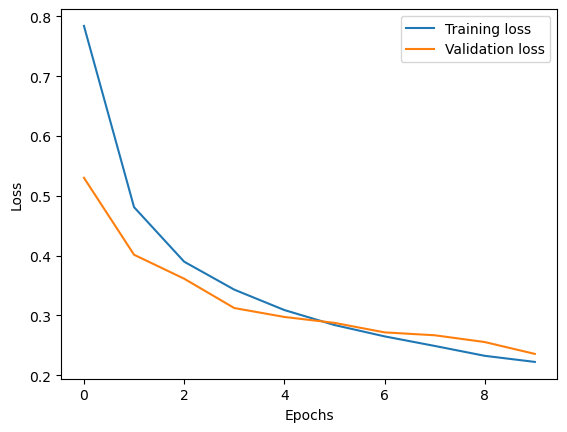

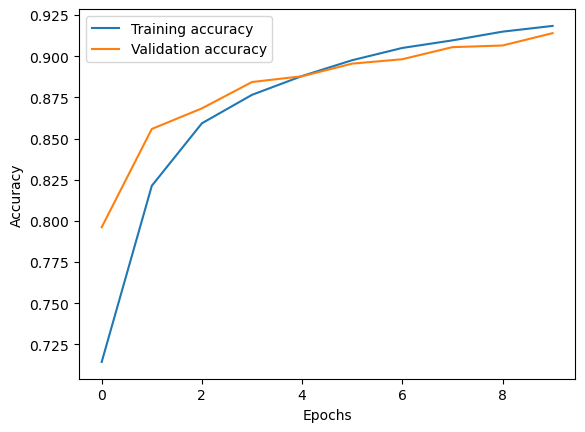

In [21]:
# shows the weights in layer 0 conv2d as gray map
top_layer = cnnModel_arch2.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Confusion Matrix generation

### Prediction for a specific testing data generte confusion matrix

313/313 [==============================] - 4s 11ms/step


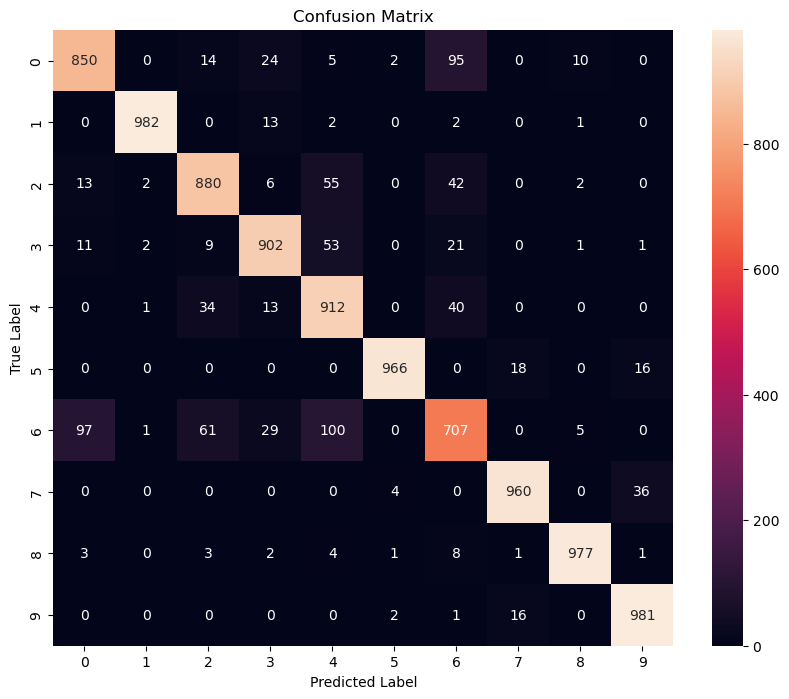

In [22]:
# Generate confusion matrix
y_pred = cnnModel_arch2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Architecture 3 
    - Conv Max Conv Max Conv Max Flatten FC FC    
    - Conv Conv Max Conv Conv Max Flatten Global Avg Pooling

In [23]:
from tensorflow.keras import models, layers, optimizers

# Conv Max Conv Max Conv Max Flatten FC FC
# Define CNN architecture 1
input_layer1 = layers.Input(shape=(28, 28, 1))
cnn1 = layers.Conv2D(32, (4,4), activation='relu')(input_layer1)
cnn1 = layers.MaxPooling2D((2, 2))(cnn1)
cnn1 = layers.Conv2D(64, (4, 4), activation='relu', padding='same')(cnn1)
cnn1 = layers.MaxPooling2D((2, 2))(cnn1)
cnn1 = layers.Conv2D(128, (4, 4), activation='relu', padding='same')(cnn1)
cnn1 = layers.MaxPooling2D((2, 2))(cnn1)
cnn1 = layers.Flatten()(cnn1)
cnn1 = layers.Dense(128, activation='relu')(cnn1)
cnn1 = layers.Dense(64, activation='relu')(cnn1)

# Conv Conv Max Conv Conv Max Flatten Global Avg Pooling
# Define CNN architecture 2
input_layer2 = layers.Input(shape=(28, 28, 1))
cnn2 = layers.Conv2D(32, (4, 4), activation='relu')(input_layer2)
cnn2 = layers.Conv2D(32, (4, 4), activation='relu', padding='same')(cnn2)
cnn2 = layers.MaxPooling2D((2, 2))(cnn2)
cnn2 = layers.Conv2D(64, (4,4), activation='relu', padding='same')(cnn2)
cnn2 = layers.Conv2D(64, (4, 4), activation='relu', padding='same')(cnn2)
cnn2 = layers.MaxPooling2D((2, 2))(cnn2)
cnn2 = layers.GlobalAveragePooling2D()(cnn2) # change in order due to incompatible with the layer.
cnn2 = layers.Flatten()(cnn2)

# Concatenate the output tensors from both architectures
concatenated = layers.Concatenate()([cnn1, cnn2])

# Additional layers after concatenation
output_layer = layers.Dense(128, activation='relu')(concatenated)
output_layer = layers.Dense(10, activation='softmax')(output_layer)

# Create the model
model = models.Model(inputs=[input_layer1, input_layer2], outputs=output_layer)

# Compile the model
optimizer = optimizers.Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 25, 25, 32)           544       ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 32)           0         ['conv2d_10[0][0]']           
 g2D)                                                                                         

In [24]:
# Passing multiple same inputs to the model as we don't have enough information.
X_train_1 = X_train
X_train_2 = X_train
X_test_1  = X_test
X_test_2  = X_test

# Train the model
history = model.fit([X_train_1, X_train_2], y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate([X_test_1, X_test_2], y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
1500/1500 [==============================] - 76s 49ms/step - loss: 0.5074 - accuracy: 0.8120 - val_loss: 0.3207 - val_accuracy: 0.8849
Epoch 2/10
1500/1500 [==============================] - 79s 53ms/step - loss: 0.3058 - accuracy: 0.8882 - val_loss: 0.2938 - val_accuracy: 0.8909
Epoch 3/10
1500/1500 [==============================] - 78s 52ms/step - loss: 0.2562 - accuracy: 0.9044 - val_loss: 0.2871 - val_accuracy: 0.9010
Epoch 4/10
1500/1500 [==============================] - 75s 50ms/step - loss: 0.2247 - accuracy: 0.9164 - val_loss: 0.2566 - val_accuracy: 0.9060
Epoch 5/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.1989 - accuracy: 0.9259 - val_loss: 0.2635 - val_accuracy: 0.9090
Epoch 6/10
1500/1500 [==============================] - 68s 46ms/step - loss: 0.1755 - accuracy: 0.9344 - val_loss: 0.2573 - val_accuracy: 0.9093
Epoch 7/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.1596 - accuracy: 0.9400 - val_loss: 0.2644 -

## Results and Outputs

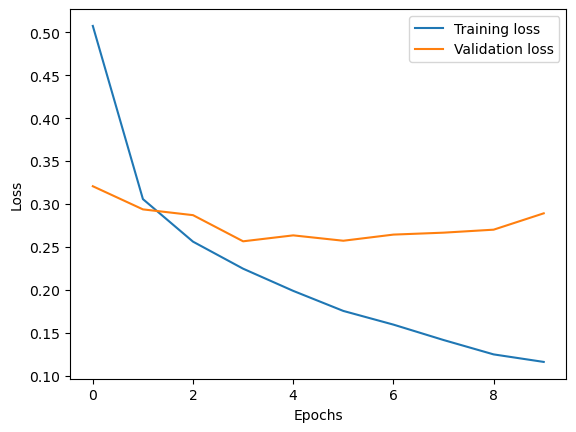

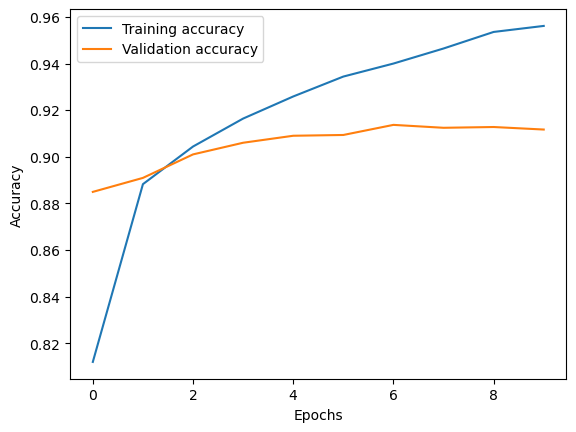

313/313 [==============================] - 5s 14ms/step


In [25]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Generate confusion matrix
y_pred = model.predict([X_test_1, X_test_2])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

## Confusion Matrix generation

### Prediction for a specific testing data generte confusion matrix

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.98      0.99      0.98      1000
           2       0.80      0.92      0.85      1000
           3       0.93      0.89      0.91      1000
           4       0.86      0.83      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.79      0.71      0.75      1000
           7       0.95      0.98      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



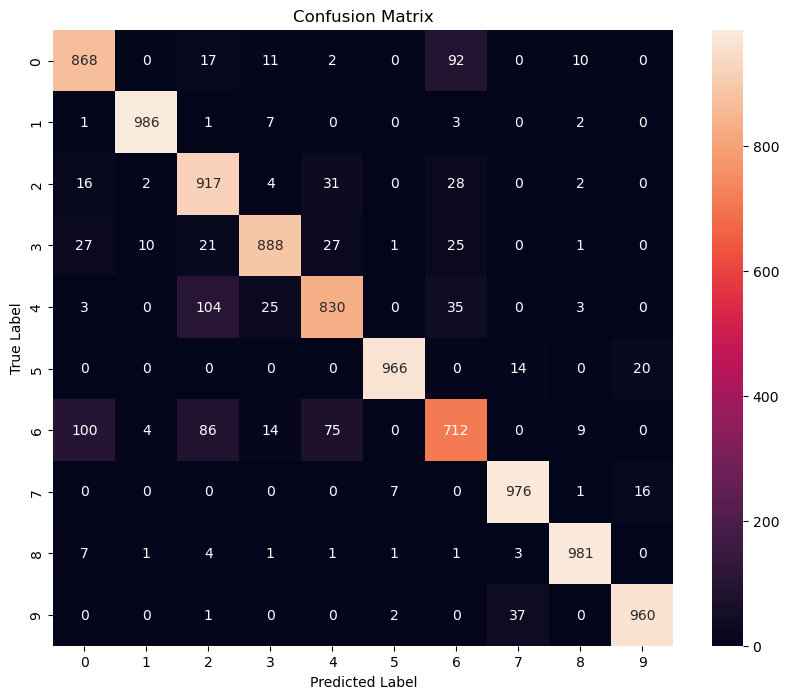

In [26]:
# Classification Report
from sklearn.metrics import classification_report 

print(classification_report(y_true, y_pred_classes))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Summary : Upon modifying the CNN architecture, the resulting model exhibited decreased accuracy when compared to the original CNN model.